<a href="https://colab.research.google.com/github/HuangJin-De/Machine-Learning-in-Atmospheric-Thermodynamics/blob/master/hw04-1/hw04-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! rm -rf Machine-Learning-in-Atmospheric-Thermodynamics
! git clone https://github.com/HuangJin-De/Machine-Learning-in-Atmospheric-Thermodynamics.git

Cloning into 'Machine-Learning-in-Atmospheric-Thermodynamics'...
remote: Enumerating objects: 638, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 638 (delta 105), reused 188 (delta 90), pack-reused 430
Receiving objects: 100% (638/638), 241.55 MiB | 49.28 MiB/s, done.
Resolving deltas: 100% (263/263), done.
Checking out files: 100% (88/88), done.


(9417, 2, 3, 101)
2111.0
1993.0
[ 0  0 13  0  0  0  0  0  0 13  0  0  0 13  0  0  0  0  0  0 14  0  0  0
  0 16  0  0  0  0  0  0  0  0  8  0  0  0  0 15  0 12  0  0 10  0  0  0
  0  0  0  8  0  0 24  0  0 15  0  0 18 15  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0 10  0  0  0  0  0  0
  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0 15  0  0  0 13  0  0  0  8  0  0  0  0  0  0
  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0 16  0 14  0  0 10  0  0  0
  0  0  0  4 17  0  0  0  0 17  0  0 18 21  0  0  0  0  0  0  0  0  0  0
  0  0  0 15  0  0 14  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  8  0
  0  0  0  0]


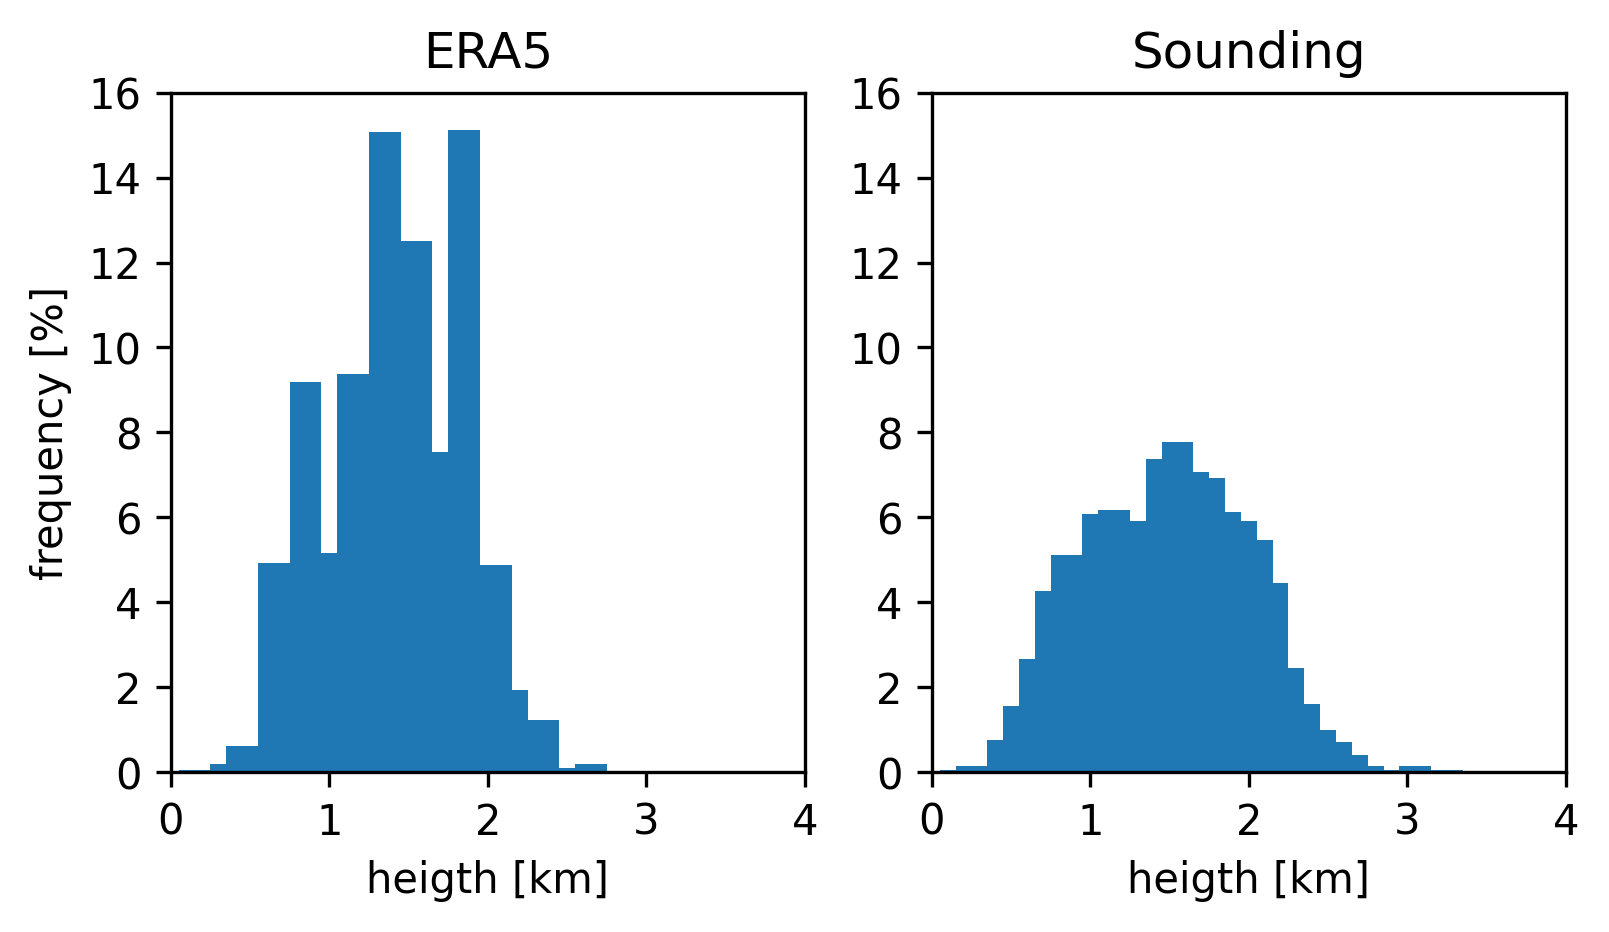

In [2]:
import numpy as np
import matplotlib.pyplot as plt

path='Machine-Learning-in-Atmospheric-Thermodynamics/hw04-1'
filen=path+'/data/inver_data.dat'

nz=101
nvar=3
data=np.fromfile(filen,dtype=np.float32)
data=data.reshape(-1,2,nvar,nz)
ind=np.arange(data.shape[0])
np.random.shuffle(ind)
data=data[ind,:,:,:]

print(data.shape)
#print(data[1,1,1,1:40])
#print(data[1,1,2,1:40])
#print(data[1,1,0,1:40])

temp=np.zeros([data.shape[0],99])
inver_era=np.argmax(data[:,0,2,0:99],1)
indx=np.arange(temp.shape[0])
indy=inver_era
temp[indx,indy]=1
temp[:,0]=0
mask_era=np.copy(temp)

#print(np.sum(mask_era,0),np.sum(mask_era))
print(np.sum(mask_era))

temp=np.zeros([data.shape[0],99])
inver_snd=np.argmax(data[:,1,2,0:99],1)
indx=np.arange(temp.shape[0])
indy=inver_snd
temp[indx,indy]=1
temp[:,0]=0
mask_snd=np.copy(temp)

#print(np.sum(mask_snd,0),np.sum(mask_snd))
print(np.sum(mask_snd))

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(6,3),dpi=300)
ax=ax.flatten()

x=0.1*np.arange(temp.shape[1])[0:50]+0.05
y=np.sum(mask_era,0)[0:50]/np.sum(mask_era)*100.
ax[0].bar(x,y,width=0.2)
ax[0].set_ylim([0,16])
ax[0].set_xlim([0,4])
ax[0].set_xlabel('heigth [km]')
ax[0].set_ylabel('frequency [%]')
ax[0].set_title('ERA5')

y=np.sum(mask_snd,0)[0:50]/np.sum(mask_snd)*100.
ax[1].bar(x,y,width=0.2)
ax[1].set_ylim([0,16])
ax[1].set_xlim([0,4])
ax[1].set_xlabel('heigth [km]')
ax[1].set_title('Sounding')

print(inver_era[0:100])
print(inver_snd[0:100])

(3,) (9417, 2, 3, 101)
0 0
0 0
0 0


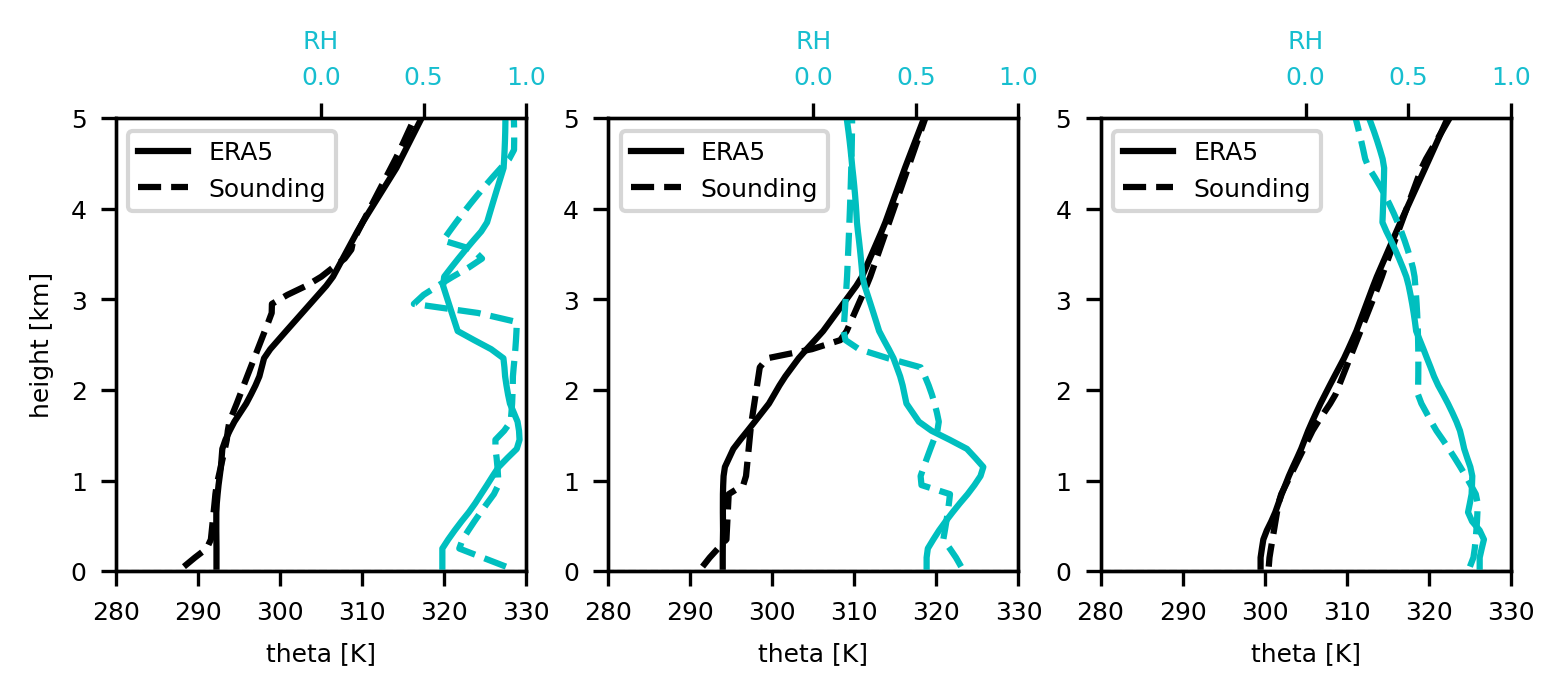

In [3]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(6,2),dpi=300)
ax=ax.flatten()

z=0.1*np.arange(temp.shape[1])+0.05
a=0
print(ax.shape,data.shape)
for n in range(0,inver_era.shape[0]):
  if inver_era[n]==0 and inver_snd[n]==0:
    print(inver_era[n],inver_snd[n])
    ax[a].plot(data[n,0,0,0:99],z,'k-',data[n,1,0,0:99],z,'k--')
    ax[a].plot([0.,600.],[0.1*inver_era[n],0.1*inver_era[n]],'k-',[0.,600.],[0.1*inver_snd[n],0.1*inver_snd[n]],'k--',lw=0.5)
    ax[a].set_ylim([0,5])
    ax[a].set_xlim([280,330])
    ax[a].set_xticks(np.arange(280,331,10))
    ax[a].set_xlabel('theta [K]',fontsize=6)
    ax[a].tick_params(labelsize=6)
    color='tab:cyan'
    ax2=ax[a].twiny()  
    ax2.plot(data[n,0,1,0:99],z,'c-',data[n,1,1,0:99],z,'c--')
    ax2.set_xlim([-1,1])
    ax2.set_xticks(np.arange(0,1.1,0.5))
    ax2.tick_params(axis='x',labelcolor=color,labelsize=6)
    ax2.set_xlabel('RH',fontsize=6,color=color)
    ax[a].legend(['ERA5','Sounding'],loc=2,fontsize=6)
    if a==0:
      ax[a].set_ylabel('height [km]',fontsize=6)
    a=a+1
  if a==3:
    break
     

(3,) (9417, 2, 3, 101)
13 15
13 13
16 16


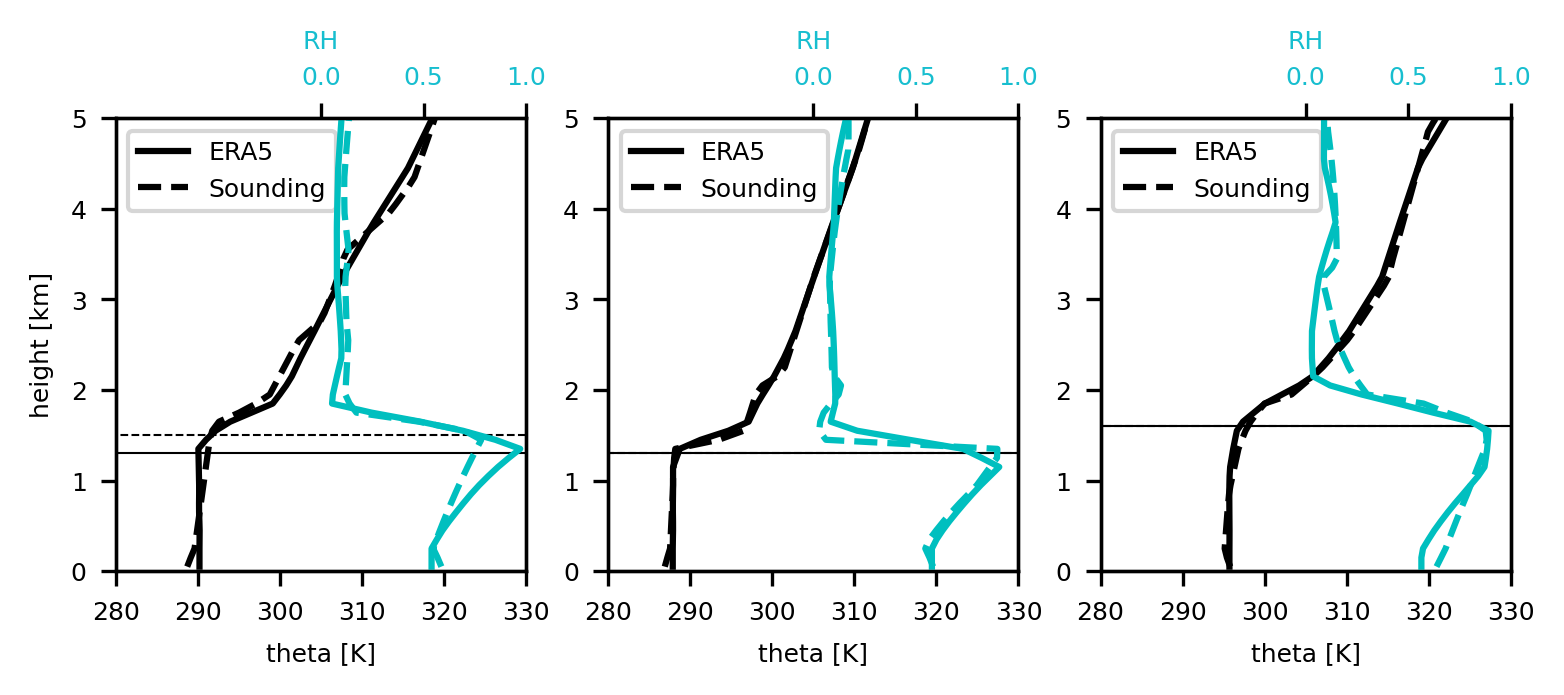

In [4]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(6,2),dpi=300)
ax=ax.flatten()

z=0.1*np.arange(temp.shape[1])+0.05
a=0
print(ax.shape,data.shape)
for n in range(0,inver_era.shape[0]):
  if inver_era[n]>0 and inver_snd[n]>0:
    print(inver_era[n],inver_snd[n])
    ax[a].plot(data[n,0,0,0:99],z,'k-',data[n,1,0,0:99],z,'k--')
    ax[a].plot([0.,600.],[0.1*inver_era[n],0.1*inver_era[n]],'k-',[0.,600.],[0.1*inver_snd[n],0.1*inver_snd[n]],'k--',lw=0.5)
    ax[a].set_ylim([0,5])
    ax[a].set_xlim([280,330])
    ax[a].set_xticks(np.arange(280,331,10))
    ax[a].set_xlabel('theta [K]',fontsize=6)
    ax[a].tick_params(labelsize=6)
    color='tab:cyan'
    ax2=ax[a].twiny()  
    ax2.plot(data[n,0,1,0:99],z,'c-',data[n,1,1,0:99],z,'c--')
    ax2.set_xlim([-1,1])
    ax2.set_xticks(np.arange(0,1.1,0.5))
    ax2.tick_params(axis='x',labelcolor=color,labelsize=6)
    ax2.set_xlabel('RH',fontsize=6,color=color)
    ax[a].legend(['ERA5','Sounding'],loc=2,fontsize=6)
    if a==0:
      ax[a].set_ylabel('height [km]',fontsize=6)
    a=a+1
  if a==3:
    break

1359


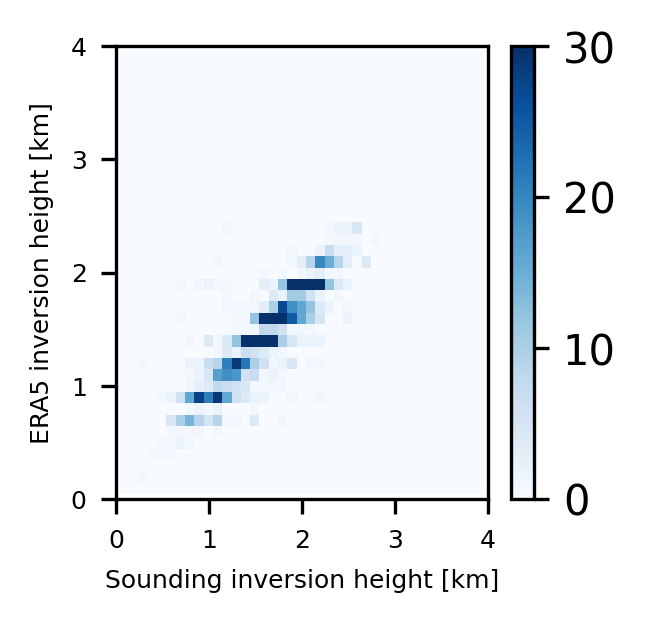

In [5]:
cm=np.zeros([40,40])
a=0
for n in range(0,inver_era.shape[0]):
  if inver_era[n]>0 and inver_snd[n]>0:
    cm[inver_era[n],inver_snd[n]]+=1
    a+=1

print(a)

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=300)

cm=ax.pcolormesh(z[0:40],z[0:40],cm,cmap='Blues',vmin=0,vmax=30)
ax.set_xticks(np.arange(0,4.1,1))
ax.set_yticks(np.arange(0,4.1,1))
ax.set_xlabel('Sounding inversion height [km]',fontsize=6)
ax.set_ylabel('ERA5 inversion height [km]',fontsize=6)
ax.tick_params(labelsize=6)
fig.colorbar(cm)

48.0 47.0


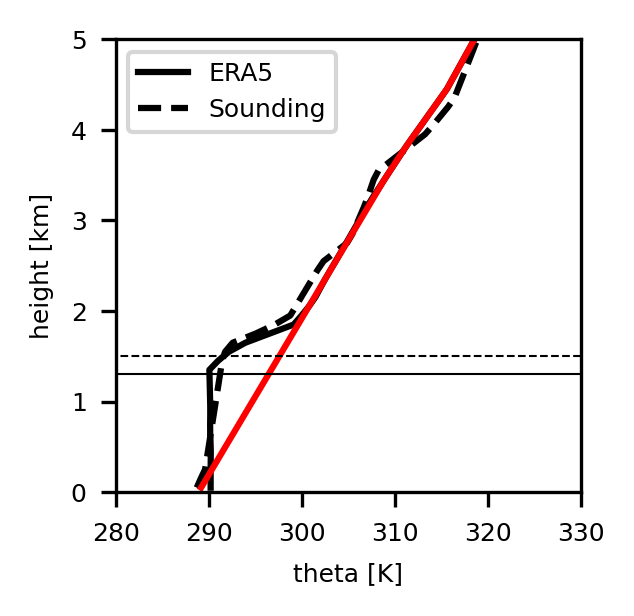

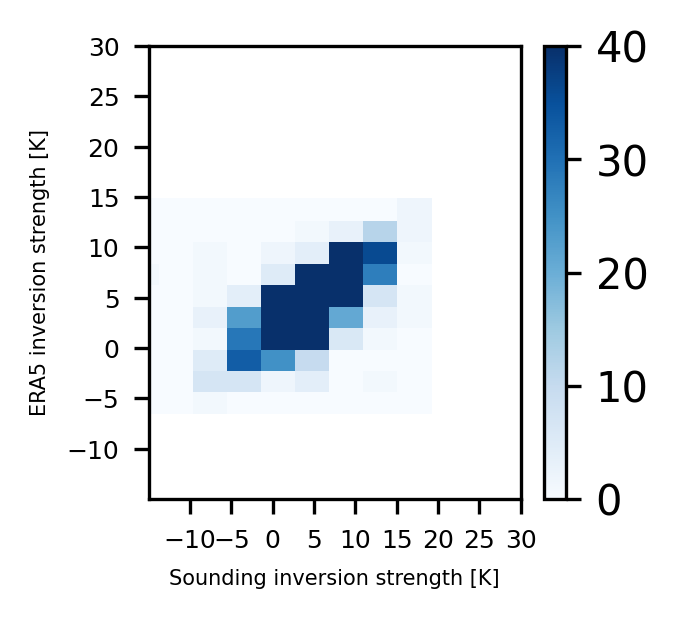

In [16]:
interp_era=np.copy(data[:,0,0,:])
rate_era=np.copy(data[:,0,2,100])
ind_era=np.copy(data[:,0,2,99])
interp_snd=np.copy(data[:,1,0,:])
rate_snd=np.copy(data[:,1,2,100])
ind_snd=np.copy(data[:,1,2,99])

#print(rate_era[0:40])
#print(ind_era[0:40])

print(np.max(ind_snd),np.max(ind_era))

for t in range(0,interp_era.shape[0]):
  nn=ind_era[t].astype(np.int64)
  for n in range(nn,0,-1):
    interp_era[t,n-1]=interp_era[t,n]-100.*rate_era[t]
  nn=ind_snd[t].astype(np.int64)
  for n in range(nn,0,-1):
    interp_snd[t,n-1]=interp_snd[t,n]-100.*rate_snd[t]

  #print(t)

#n=190
#print(ind_snd[n],ind_era[n],rate_snd[n],rate_era[n])
#print(interp_era[n,:],interp_snd[n,:])
#print(inver_era[n],inver_snd[n])

a=0
inv_era=[]
inv_snd=[]
for n in range(0,inver_era.shape[0]):
  if inver_era[n]>0 and inver_snd[n]>0:
    #print(a,n,inver_era[n],inver_snd[n])
    if a==0:
      fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=300)
      ax.plot(data[n,0,0,0:99],z,'k-',data[n,1,0,0:99],z,'k--',interp_era[n,0:99],z,'r-')
      ax.plot([0.,600.],[0.1*inver_era[n],0.1*inver_era[n]],'k-',[0.,600.],[0.1*inver_snd[n],0.1*inver_snd[n]],'k--',lw=0.5)
      ax.set_ylim([0,5])
      ax.set_xlim([280,330])
      ax.set_xticks(np.arange(280,331,10))
      ax.set_xlabel('theta [K]',fontsize=6)
      ax.tick_params(labelsize=6)
      ax.legend(['ERA5','Sounding'],loc=2,fontsize=6)
      ax.set_ylabel('height [km]',fontsize=6)

    inv=interp_era[n,inver_era[n]]-data[n,0,0,inver_era[n]]
    inv_era.append(inv)
    inv=interp_snd[n,inver_snd[n]]-data[n,1,0,inver_snd[n]]
    inv_snd.append(inv)
  
    a=a+1


fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=300)
cm=plt.hist2d(inv_snd,inv_era,cmap='Blues',vmin=0,vmax=40)
plt.colorbar()
ax.set_ylim([-15,20])
ax.set_xlim([-15,20])
ax.set_xticks(np.arange(-10,31,5))
ax.set_yticks(np.arange(-10,31,5))
ax.set_xlabel('Sounding inversion strength [K]',fontsize=5)
ax.set_ylabel('ERA5 inversion strength [K]',fontsize=5)
ax.tick_params(labelsize=6)




-1.0384521
-1.0696411
-0.8243408
-0.13653564
-1.3460999
-0.4249878


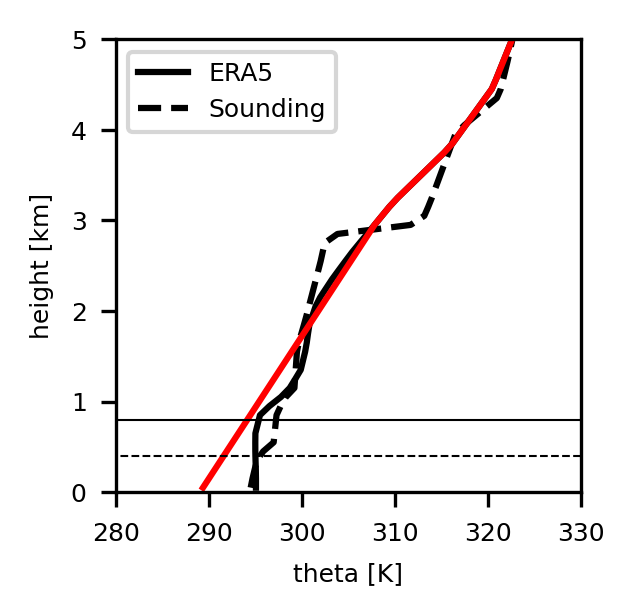

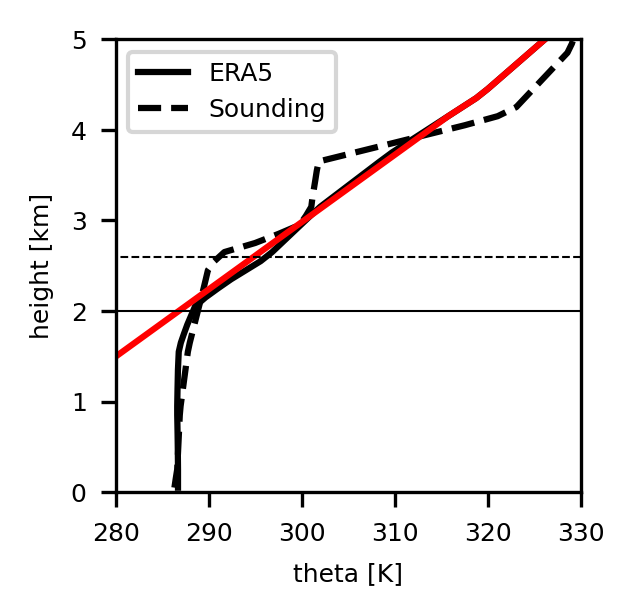

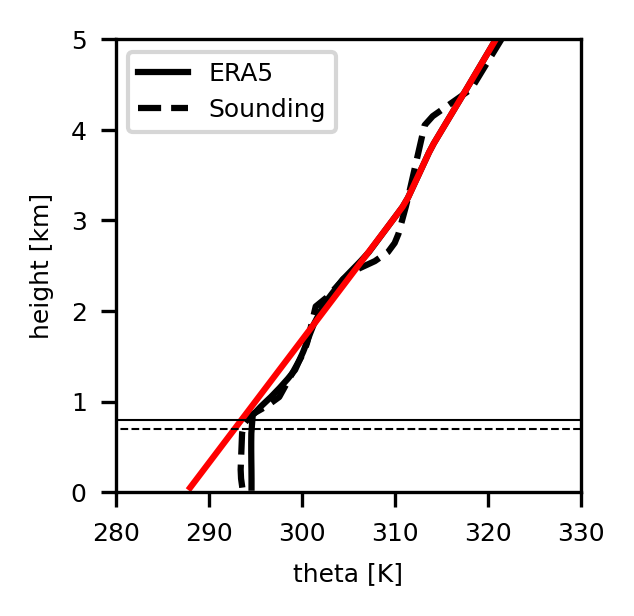

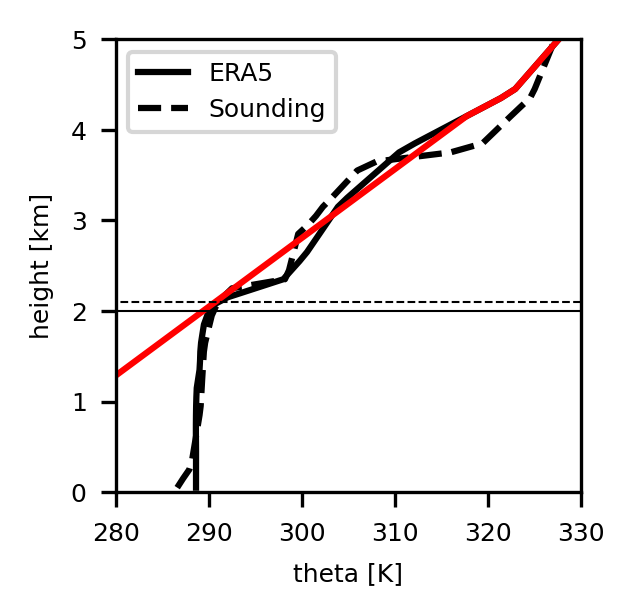

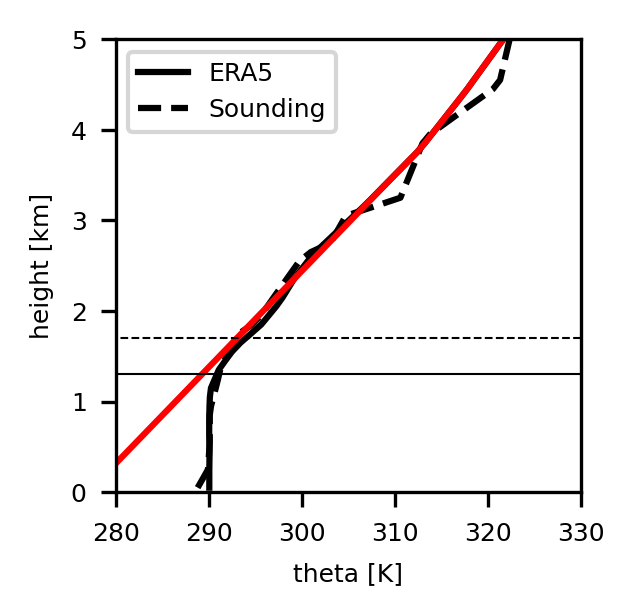

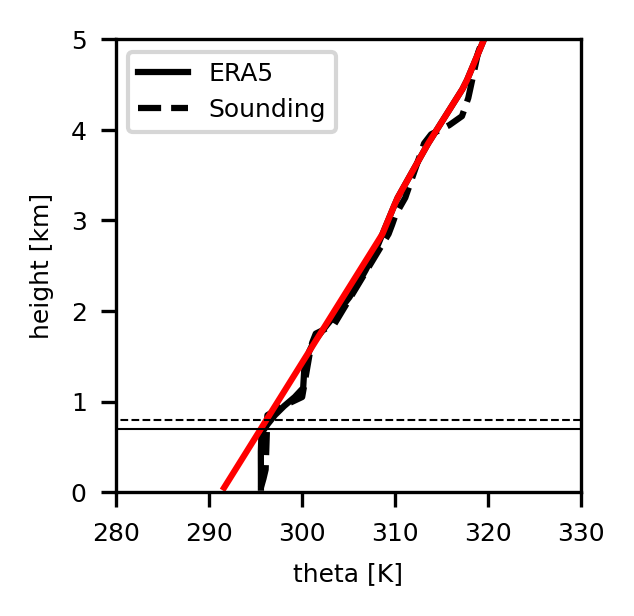

In [17]:
a=0
inv_era=[]
inv_snd=[]
for n in range(0,inver_era.shape[0]):
  if inver_era[n]>0 and inver_snd[n]>0:
    inv=interp_era[n,inver_era[n]]-data[n,0,0,inver_era[n]]
    inv_era.append(inv)
    #inv=interp_snd[n,inver_snd[n]]-data[n,1,0,inver_snd[n]]
    #inv_snd.append(inv)

    if a<=5 and inv<=0:
      print(inv)
      fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=300)
      ax.plot(data[n,0,0,0:99],z,'k-',data[n,1,0,0:99],z,'k--',interp_era[n,0:99],z,'r-')
      ax.plot([0.,600.],[0.1*inver_era[n],0.1*inver_era[n]],'k-',[0.,600.],[0.1*inver_snd[n],0.1*inver_snd[n]],'k--',lw=0.5)
      ax.set_ylim([0,5])
      ax.set_xlim([280,330])
      ax.set_xticks(np.arange(280,331,10))
      ax.set_xlabel('theta [K]',fontsize=6)
      ax.tick_params(labelsize=6)
      ax.legend(['ERA5','Sounding'],loc=2,fontsize=6)
      ax.set_ylabel('height [km]',fontsize=6)
      a=a+1
